# Initiering

In [1]:
% reset
# Initiering
# Import packages
import json
import sympy
import numpy
import matplotlib.pyplot as plt
from sympy import *
from matplotlib.pyplot import *
init_printing()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# AD-AS modellen

In [2]:
# Declaring variables
## Endogenous
Y, C, I, G, Ld, Ms, P, M, W, u, L, N = sympy.symbols('Y C I G L_d M_s, P, M, W, u, L, N')
Ys, Id = sympy.symbols('Y^s I^d')
## Parametere og konstantledd
oC, c1, b, oI, k, h, t, l1, l2, mu, alpha, A, Ac = sympy.symbols('oC c_1 b oI, k, h, t l_1 l_2 mu alpha A Ac')
## Exogene styringsvariableh
oG, i, T, Pe, z = sympy.symbols('oG i T Pe z')

In [3]:
beforems = set(dir())
## Aktører
### Husholdningero
#### Konsumfunksjon
CD = Eq(C,oC + c1*(Y-T))
#### Pengeetterspørsel
LD = Eq(Ld,k*Y-h*i)
#### Tilbud av arbeidskraft
#LS = Eq(W,Pe*(l1*u + l2*z))
LS = Eq(W,Pe*(Ac+l1*u))

### Bedrifter
YS = Eq(Ys, Y)
PF = Eq(Y, A*L*alpha)
PS = Eq(P, (1+mu)*W)
#### Investeringer
ID = Eq(Id,oI - b*i)
## Offentlig
### Offentlig myndigheter
GD = Eq(G, oG)
TR = Eq(T, t*Y)
### Sentralbanken
MS = Eq(Ms,M/P)
## Markeder
### Varemarkedet
EQV = Eq(Y, C + I + G)
### Pengemarkedet
EQM = Eq(Ld, Ms)
### Definisjoner
DLE = Eq(u, 1 - (L/N))

## Løsning av modellen
## Likevekt godemarkedet
ISC = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD, C)[0]), (I, solve(ID, Id)[0])]), Y)[0])
## Likevekt pengemarkedet
LMC = Eq(Y,solve(EQM.subs([(Ms, solve(MS,Ms)[0]),(Ld,solve(LD,Ld)[0])]),Y)[0])
## Samtidig likevekt
SEQi =Eq(i,solve(LMC.subs(Y,solve(ISC,Y)[0]),i)[0])
SEQY = Eq(Y,solve(ISC.subs(i,solve(LMC,i)[0]),Y)[0])
AD = Eq(P,solve(SEQY,P)[0])
## AS
AS = PS.subs([(W, solve(LS,W)[0]),(u,solve(DLE.subs(L,solve(PF,L)[0]),u)[0])])
afterms = set(dir())

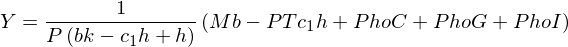

In [6]:
SEQY

In [10]:
modvardict = list(afterms - beforems)
modvardict.remove('beforems')
#
modlatequ = dict()
modequ = dict()

for teller in range(0,len(modvardict)):
    eqvar = modvardict[teller]
    modlatequ[eqvar] = latex(eval(modvardict[teller]))
    modequ[eqvar] = str(eval(modvardict[teller]).rhs)
   
expdeftex = open('adasctex.json', 'w')
json.dump(modlatequ,expdeftex)
expdeftex.close()
expdefequ = open('adascequ.json', 'w')
json.dump(modequ,expdefequ)
expdefequ.close()
modvardict

['AS',
 'AD',
 'PF',
 'YS',
 'SEQi',
 'LD',
 'CD',
 'ID',
 'PS',
 'GD',
 'EQM',
 'EQV',
 'MS',
 'LMC',
 'DLE',
 'ISC',
 'LS',
 'TR',
 'SEQY']